# <center> Stromnetz Graz Smart Meter Analysis

In [1]:
# Imports for plot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib.gridspec as gridspec
# Custom Modules
from modules.user import user
from modules.filehandling import OsInterface

## Setup

In [2]:
user_instance = user()                       # Create user from user_data file
OsInterface(user_instance).scrapandmove()    # Update data from stromnetzgraz website

# Create dataframes with all data
df_day = OsInterface(user_instance).create_dataframe(user_instance.Folder['work_daysum'], user_instance.Meter['day_meter'])
df_night = OsInterface(user_instance).create_dataframe(user_instance.Folder['work_daysum'], user_instance.Meter['night_meter'])

Firefox headless mode activated
pwd_enc
<class 'tomlkit.items.String'>
FnepEncCs0lbp+iE4ro4dGPde5gI7FpNtfUNmOAYm6SRyBdqKOBvtWumfijT1pkYliwumtscPdBrYZaICTkonYVMWePyasdSltEstljILjjreDietzEoO8J05ReQfH7U+nyjV210+XuExB/w2HWrI8ACfjSKbZXtZzlof+tDBaE=

b64_decode
<class 'bytes'>
b'\x16w\xa9\x12w\x02\xb3I[\xa7\xe8\x84\xe2\xba8tc\xdd{\x98\x08\xecZM\xb5\xf5\r\x98\xe0\x18\x9b\xa4\x91\xc8\x17j(\xe0o\xb5k\xa6~(\xd3\xd6\x99\x18\x96,.\x9a\xdb\x1c=\xd0ka\x96\x88\t9(\x9d\x85LY\xe3\xf2j\xc7R\x96\xd1,\xb6X\xc8.8\xebx8\x9e\xb71(;\xc2t\xe5\x17\x90|~\xd4\xfa|\xa3Wmt\xf9{\x84\xc4\x1f\xf0\xd8u\xab#\xc0\x02~4\x8am\x95\xedg9h\x7f\xebC\x05\xa1'

password
<class 'str'>
Gwhwk12.

Downloaded data with the following arguments:
Start date: 21-08-2023
End date: 22-08-2023


In [3]:
df_day.tail()

,date,zaehlerstand,verbrauch
235,2023-08-18,3185.147,3592.0
236,2023-08-19,3187.785,2638.0
237,2023-08-20,3192.502,4717.0
238,2023-08-21,0.000,4450.0
239,2023-08-22,0.000,0.0


## Analysis

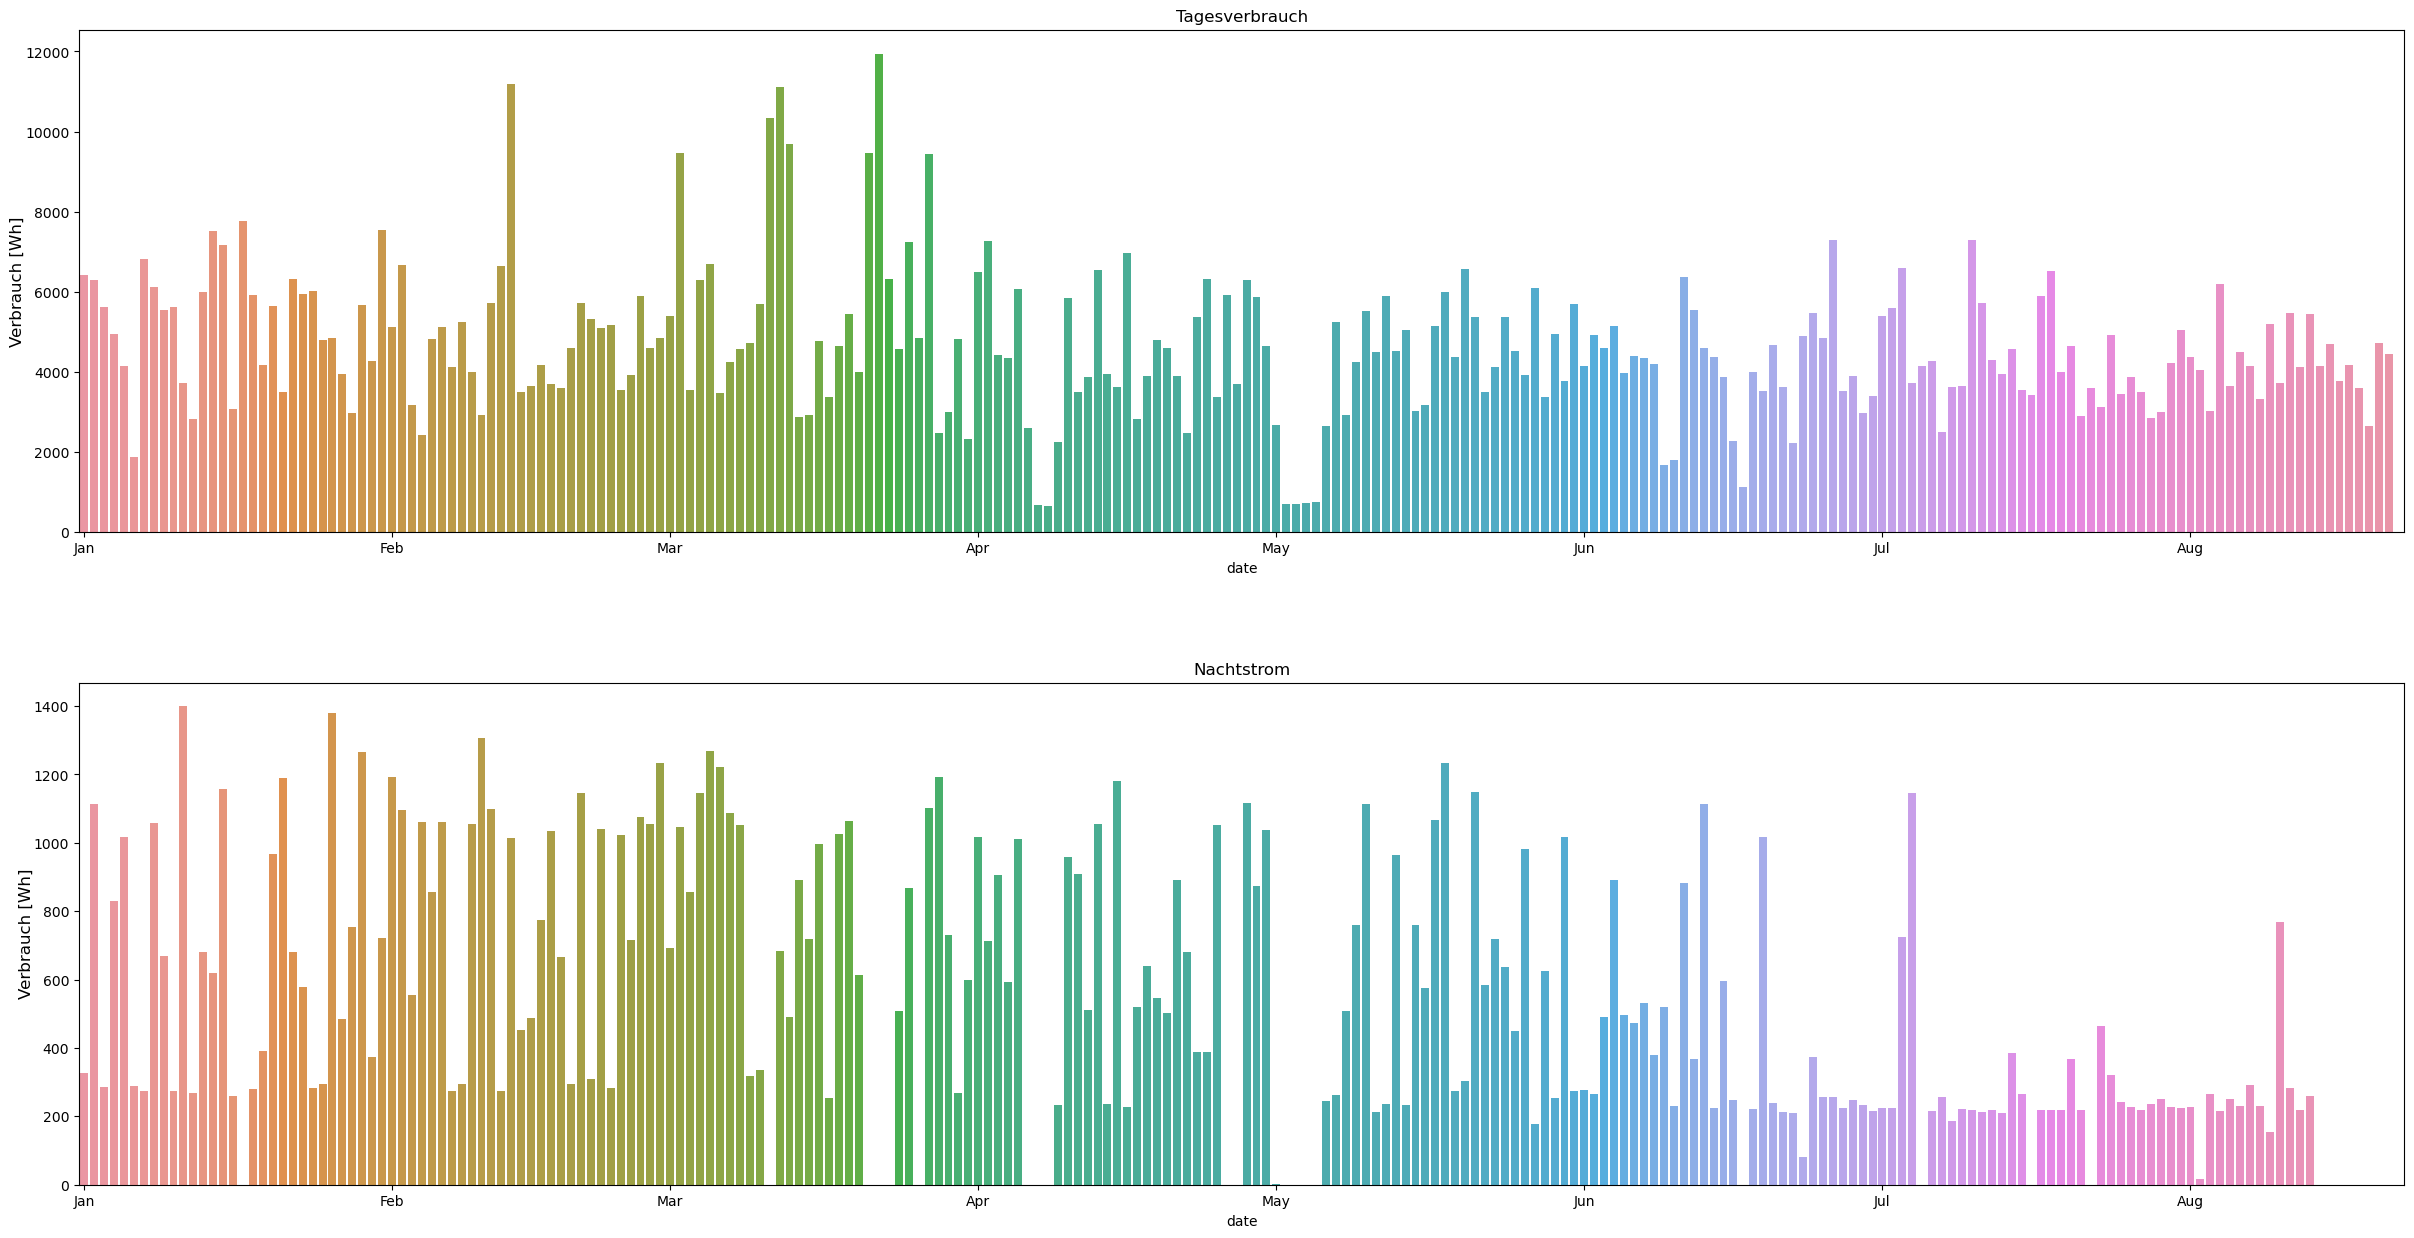

In [4]:
fig = plt.figure(figsize =([30, 15]))

# Gridspec Setup
gs = gridspec.GridSpec(2, 2)
ax = plt.subplot(gs[0, 0])
gs.update(wspace = 0.1, hspace = 0.3)

### AX1 ###
ax1 = plt.subplot(gs[0, :2])
sns.barplot(data=df_day,
            x='date',
            y='verbrauch')
ax1.set_ylabel('Verbrauch [Wh]', labelpad = 0, fontsize = 12)
ax1.xaxis.set_major_locator(md.MonthLocator())
ax1.xaxis.set_major_formatter(md.DateFormatter('%b'))
ax1.set_title('Tagesverbrauch')

### AX2 ###
ax2 = plt.subplot(gs[1, :2])
sns.barplot(data=df_night,
            x='date',
            y='verbrauch')
ax2.set_ylabel('Verbrauch [Wh]', labelpad = 0, fontsize = 12)
ax2.xaxis.set_major_locator(md.MonthLocator())
ax2.xaxis.set_major_formatter(md.DateFormatter('%b'))
ax2.set_title('Nachtstrom')

### Draw Plot ###
plt.show()